In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
df = pd.read_csv("./Data/Speed Dating Data.csv", encoding="ISO-8859-1")

In [51]:
df.fillna(value = {"income": "0"}, inplace = True)

In [53]:
na_calc = df.isnull().sum() / len(df)

In [54]:
# Let's get rid of all the variables that have more than 50% of null values
filtered_na_calc = na_calc[na_calc < 0.05].index

In [55]:
clean_df = df.loc[:,filtered_na_calc]

In [56]:
# Finally we drop the inputs where we have null values, just so we can proceed quickly with a first version of our dataset
dating = clean_df.dropna()
dating.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'race', 'imprace',
       'imprelig', 'from', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'attr',
       'sinc', 'intel', 'fun', 'like', 'prob', 'met'],
      dtype='object')

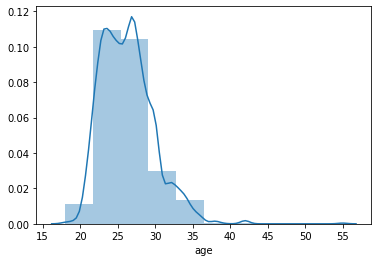

In [59]:
sns.distplot(dating["age"], bins=10)

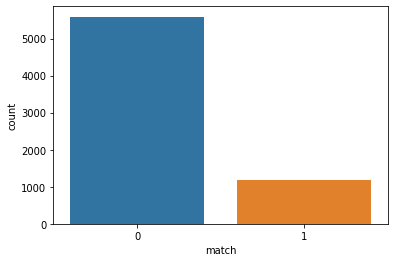

In [38]:
sns.countplot("match", data = dating)

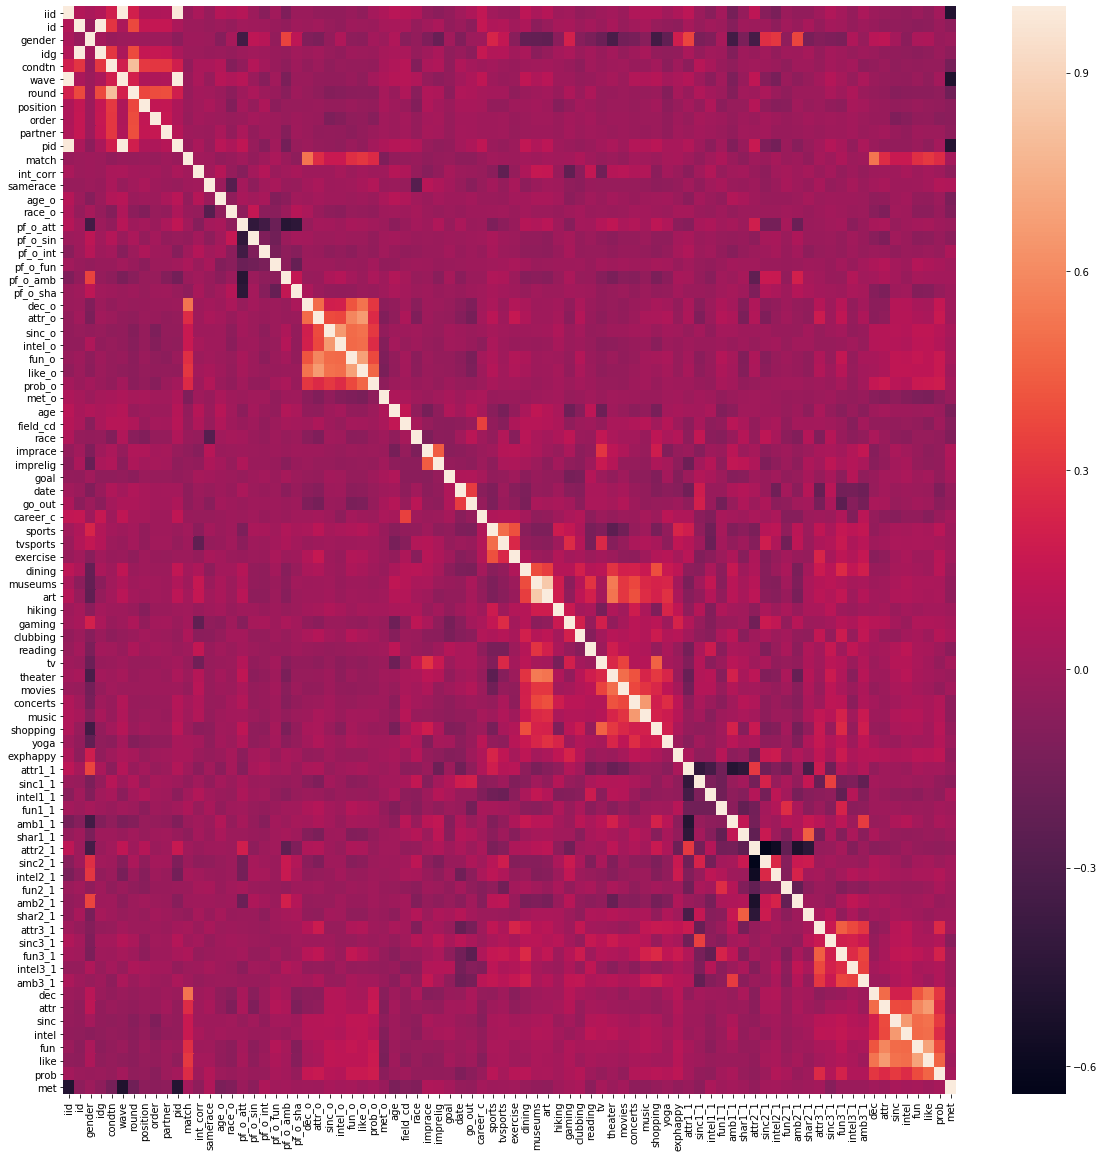

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(dating.corr())

In [31]:
# Let's isolate numeric values from non numeric ones
dating3 = dating.loc[:, dating.dtypes[dating.dtypes == 'object'].index]
dating2 = dating.loc[:, dating.dtypes[dating.dtypes != 'object'].index]

In [32]:
def sortSecond (val):
    return val[1]

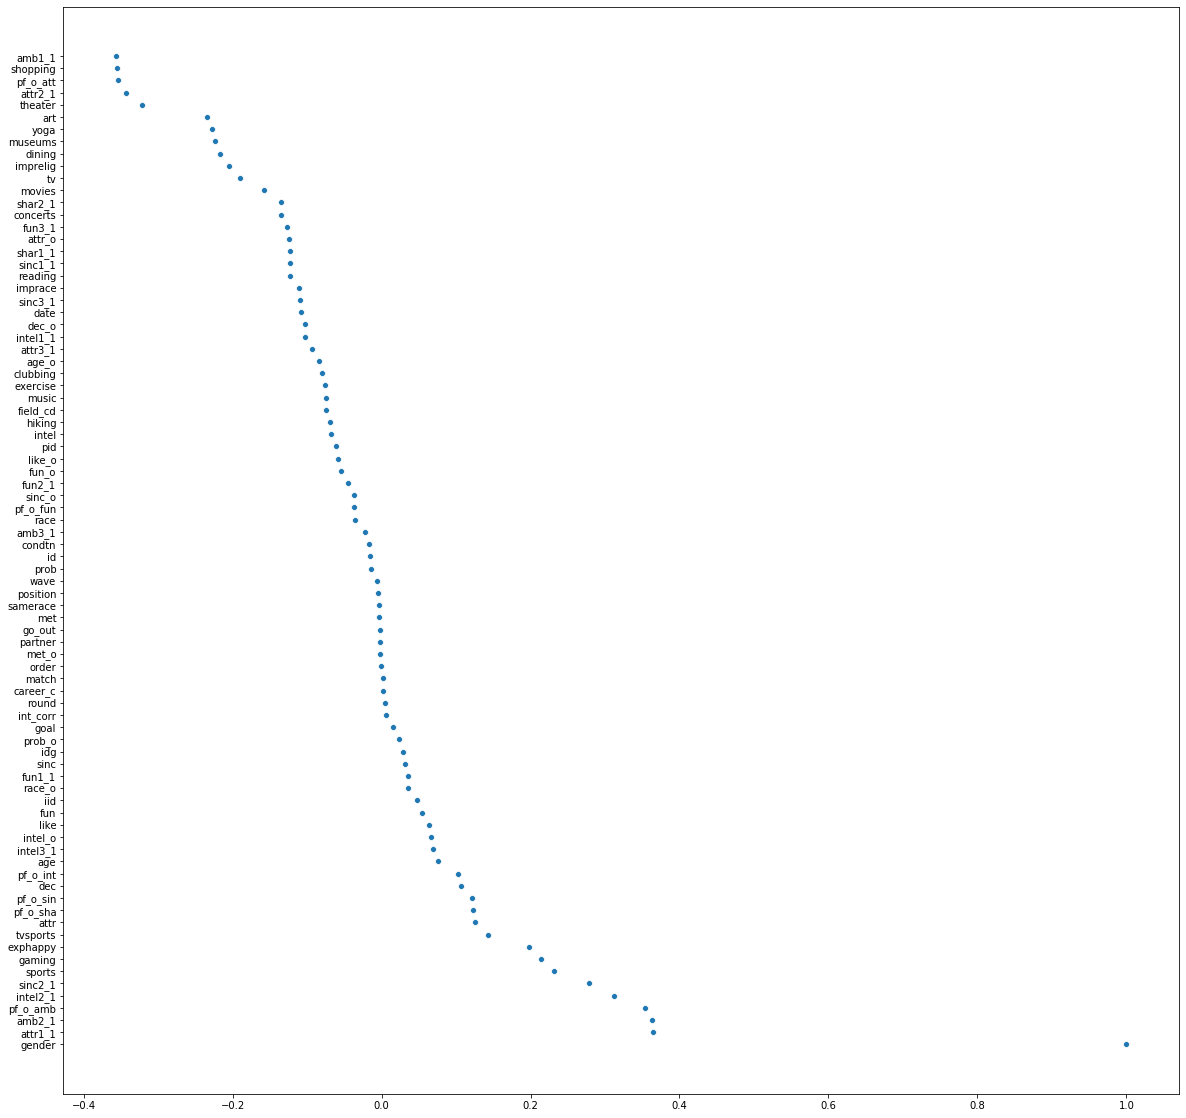

In [37]:
# Let's try to verify the preferences by gender
list_corr_gender = [(col, dating2["gender"].corr(dating[col])) for col in dating2.columns]
list_corr_gender.sort(key = sortSecond, reverse = True)
plt.figure(figsize = (20,20))
sns.scatterplot(list(dict(list_corr_gender).values()), list(dict(list_corr_gender).keys()))

### Some conclusions
- Men are mostly looking for attractive women
- Women are mostly looking for ambitious men
- Men globally know that women are looking for ambititous men
- Women globally know that men are looking for attractive women
- Women are mostly interested in shopping or theater
- Men are mostly interested in sports and gaming

In [ ]:
# Which are the less relevant characteristics

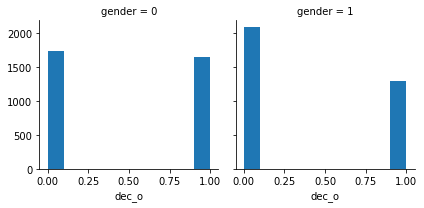

In [39]:
# Which gender is more likely to reject the other?
g = sns.FacetGrid(dating, col="gender")
g = g.map(plt.hist, 'dec_o')

### Conclusion
- Women are more "selective" than men

In [26]:
dating_int = dating.loc[:, ["concerts", "music", "art", "shopping", "yoga", "gender"]]

In [60]:
# Broken hearted
dating["brheart"]=dating.dec+dating.dec_o
dating_brheart_per = len(dating[(dating.brheart==1)])  / len(dating) 
dating_brheart_per

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.5205843293492696